In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error


df=pd.read_csv('Liver_disease1.csv')
df.head(10)


#data = pd.read_csv('Liver_disease1.csv')

#missing_values = data.isnull().sum()
#print(missing_values)

#duplicates = data.duplicated().sum()
#print(f'Duplicates: {duplicates}')



,Age,Gender,BMI,AlcoholConsumption,Smoking,GeneticRisk,PhysicalActivity,Diabetes,Hypertension,LiverFunctionTest,Diagnosis
0,58,0,35.857584,17.272828,0,1,0.658940,0,0,42.734240,1
1,71,1,30.732470,2.201266,0,1,1.670557,1,0,67.309822,1
2,48,0,19.971407,18.500944,0,0,9.928308,0,0,63.738956,0
3,34,1,16.615417,12.632870,0,0,5.630129,0,0,64.555873,1
4,62,1,16.065830,1.087815,0,1,3.566218,1,0,77.868689,1
5,27,1,24.285214,12.885134,0,2,2.882027,0,0,50.535064,1
6,80,0,21.646278,19.484953,0,1,2.569917,0,0,45.527997,0
7,40,0,31.152253,1.396013,0,0,6.641528,0,0,88.226766,0
8,58,0,27.483346,11.093754,1,0,4.193878,0,0,37.607603,1
9,77,1,21.650482,14.955887,1,1,9.654107,0,0,34.419683,1


In [2]:

#if gender was in strings
#le_Gender = LabelEncoder()
#df['Gender'] = le_Gender.fit_transform(df['Gender'])


x=df.drop(['Diagnosis'],axis='columns')
y=df['Diagnosis']
x.head()

,Age,Gender,BMI,AlcoholConsumption,Smoking,GeneticRisk,PhysicalActivity,Diabetes,Hypertension,LiverFunctionTest
0,58,0,35.857584,17.272828,0,1,0.658940,0,0,42.734240
1,71,1,30.732470,2.201266,0,1,1.670557,1,0,67.309822
2,48,0,19.971407,18.500944,0,0,9.928308,0,0,63.738956
3,34,1,16.615417,12.632870,0,0,5.630129,0,0,64.555873
4,62,1,16.065830,1.087815,0,1,3.566218,1,0,77.868689


In [4]:
from sklearn.preprocessing import MinMaxScaler
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=120)
print('The length for training is:',len(x_train))
print('The length for Testing is:',len(x_test))


scaler = MinMaxScaler()
new_xtrain=scaler.fit_transform(x_train)
new_xtest=scaler.fit_transform(x_test)

KNN=KNeighborsClassifier(n_neighbors=5)
KNN.fit(new_xtrain,y_train)


The length for training is: 1190
The length for Testing is: 510


KNeighborsClassifier()

In [5]:
knn_score=KNN.score(new_xtest,y_test)
print("The Accuracy for KNN is",knn_score)

ypredictKNN=KNN.predict(new_xtest)
print("The Predicited Values are",ypredictKNN)

mae_knn = mean_absolute_error(y_test, ypredictKNN)
print("The Mean Absolute Error for KNN is", mae_knn)


The Accuracy for KNN is 0.8215686274509804
The Predicited Values are [0 0 0 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 1
 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1
 1 0 1 1 1 1 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 1 0 1 1 0 1 0
 1 0 1 1 0 0 0 1 1 1 0 0 0 1 1 1 0 1 0 1 1 1 0 0 0 0 1 1 1 1 1 0 1 0 1 0 1
 1 1 0 1 0 1 1 0 0 1 0 0 0 1 1 0 1 0 0 0 1 1 1 0 0 1 1 0 0 1 0 0 1 1 1 1 0
 1 0 1 0 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 0 0 1
 1 1 1 1 1 1 1 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 1 0 0 0 0 1 1 0 1 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 1 0 1 1 0 1 1 1 0 0 0 0 0 1 0 1 1 1
 1 1 1 0 0 1 0 1 0 0 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0
 1 0 1 0 1 1 1 1 1 0 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 1 0 1 1 0 0 0 0
 1 0 1 1 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1 1 0 0 0 0
 0 0 0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 1 1
 0 0 0 1 1 1 1 0 0 1 1 1 0 0 1 

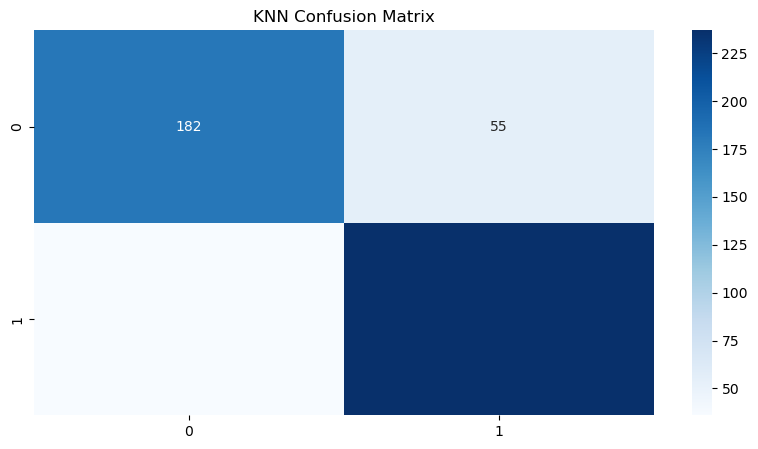

In [6]:
import seaborn as sn 
from sklearn.metrics import confusion_matrix,precision_score,accuracy_score


from sklearn.preprocessing import LabelBinarizer

binarizer = LabelBinarizer()
y_test_binary = binarizer.fit_transform(y_test)
ypredictKNN_binary = binarizer.transform(ypredictKNN)

conf_matrixKnn = confusion_matrix(y_test_binary, ypredictKNN_binary)

plt.figure(figsize=(10,5))
sn.heatmap(conf_matrixKnn,annot=True,cmap='Blues',fmt='d',xticklabels=[0,1,],yticklabels=[0,1])
plt.title("KNN Confusion Matrix")
plt.xlabel = 'Predicted'
plt.ylabel = 'Actual'
plt.show()


The Accuracy for Gradient Boosting 0.9058823529411765
The Predicted Values are [0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 1
 1 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1
 1 0 1 1 0 1 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 0 0 1 0
 1 0 1 1 0 0 0 1 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 0 1 0 0
 1 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1
 1 0 1 0 1 0 1 0 0 1 1 1 0 1 0 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 0 1
 1 1 1 0 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 1 1 1 1 0 0 1 1 1 0 0 0 0 1 0 1 0 1
 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 0
 1 0 1 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 0 0 1 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 1 1 0 1 1 1 0 1 1 1 0 1 0 0
 0 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 0 0 1 0 1 1 1 1 0
 0 0 0 1 1 1 1 0 0 1 

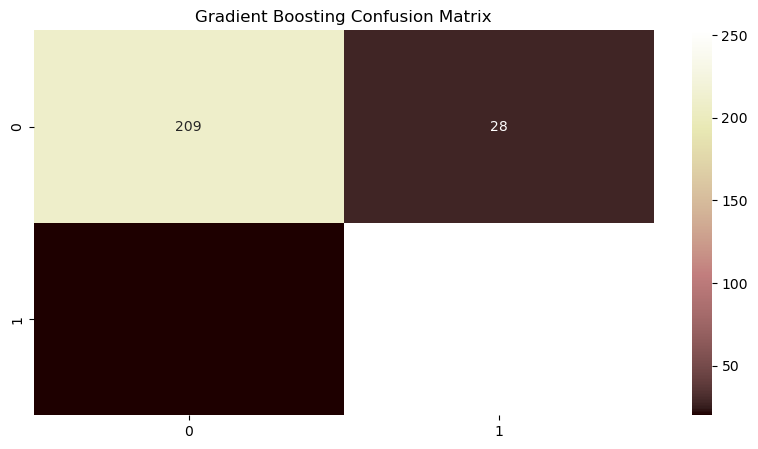

In [7]:
#------------------------------Gradient Boosting-----------------------------------#
from sklearn.ensemble import GradientBoostingClassifier
gradientboosting=GradientBoostingClassifier(n_estimators=300,learning_rate=0.02,max_features=5, random_state=120)
gradientboosting.fit(new_xtrain,y_train)

gradientboostingscore=gradientboosting.score(new_xtest,y_test)
print("The Accuracy for Gradient Boosting",gradientboostingscore)

ypredictGradientBoositng=gradientboosting.predict(new_xtest)
print('The Predicted Values are',ypredictGradientBoositng)

mae_gb = mean_absolute_error(y_test, ypredictGradientBoositng)
print("The Mean Absolute Error for Gradient Boosting is", mae_gb)


import seaborn as sn 
from sklearn.metrics import confusion_matrix,precision_score,accuracy_score
from sklearn.preprocessing import LabelBinarizer

binarizer = LabelBinarizer()
y_test_binary = binarizer.fit_transform(y_test)
ypredictGradboosting_binary = binarizer.transform(ypredictGradientBoositng)

conf_matrixGradientBoosting = confusion_matrix(y_test_binary, ypredictGradboosting_binary)

plt.figure(figsize=(10,5))
sn.heatmap(conf_matrixGradientBoosting,annot=True,cmap='pink',fmt='d',xticklabels=[0,1],yticklabels=[0,1])
plt.title("Gradient Boosting Confusion Matrix")
plt.xlabel=('Prediciton')
plt.y_label=('Actual')
plt.show()


The Accuracy for Decision Tree 0.8254901960784313
The Predicted Values are [1 0 0 0 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 0 0 0 0 1 1 0 1
 1 1 0 0 1 1 1 1 0 0 0 0 0 1 1 1 1 0 1 0 0 0 1 1 1 1 1 0 1 0 1 0 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 1 1 1 0 0 1 1 0 0 1 1 0 0 0
 1 1 1 1 0 0 1 1 1 0 0 0 0 1 1 1 0 0 1 1 1 0 0 1 1 0 1 1 1 0 1 0 1 0 1 0 0
 1 1 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1
 1 0 1 0 1 0 1 0 0 1 1 1 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 1
 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 0 1
 1 1 1 0 0 1 1 1 0 0 1 1 0 1 0 0 1 1 0 1 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 1
 0 1 1 0 0 1 0 0 1 1 0 1 0 1 1 0 0 1 0 1 0 1 0 0 1 1 1 0 1 0 0 1 1 1 1 1 0
 1 0 1 0 1 1 1 1 1 0 0 0 1 1 1 0 0 1 1 0 1 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0
 0 0 1 0 1 1 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 0
 0 0 0 1 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 1 0 0 0 0 1 1 1 0 0
 0 0 1 1 1 0 1 0 0 1 1 0 

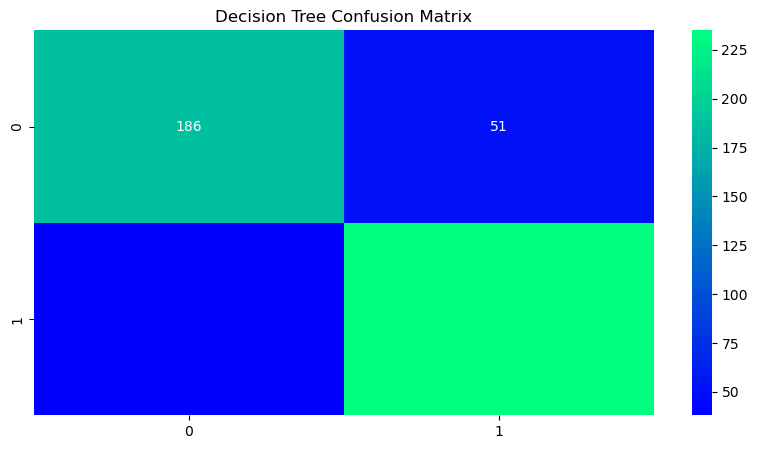

In [8]:
#----------------------------------------Decision Tree------------------------------------#
from sklearn.tree import DecisionTreeClassifier
Dt=DecisionTreeClassifier()
Dt.fit(new_xtrain,y_train)
DecisionTreeScore=Dt.score(new_xtest,y_test)
print("The Accuracy for Decision Tree",DecisionTreeScore)

ypredictDt=Dt.predict(new_xtest)
print('The Predicted Values are',ypredictDt)
mae_dt = mean_absolute_error(y_test, ypredictDt)
print("The Mean Absolute Error for Decision Tree is", mae_dt)

from sklearn.preprocessing import LabelBinarizer

binarizer = LabelBinarizer()
y_test_binary = binarizer.fit_transform(y_test)
ypredictDecisionTree_binary = binarizer.transform(ypredictDt)

conf_matrixDecisionTree = confusion_matrix(y_test_binary, ypredictDecisionTree_binary)

plt.figure(figsize=(10,5))
sn.heatmap(conf_matrixDecisionTree,annot=True,cmap='winter',fmt='d',xticklabels=[0,1],yticklabels=[0,1])
plt.title("Decision Tree Confusion Matrix")
plt.xlabel=('Prediciton')
plt.ylabel=('Actual')
plt.show()


The Accuracy for Random Forest 0.8941176470588236
The Predicted Values are [1 0 0 0 0 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 0 0 0 0 1 1 0 1
 1 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1
 1 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 0 0 1 0
 1 0 1 1 0 0 0 1 1 1 0 0 0 1 1 1 0 0 0 1 1 1 0 1 0 0 1 1 1 1 1 0 1 0 1 0 0
 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1
 1 0 1 0 1 0 1 0 0 1 1 1 0 1 0 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 0 1
 1 1 1 0 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 1 1 1 1 0 0 1 1 1 0 0 0 0 1 0 1 0 1
 1 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 0
 1 0 1 0 1 1 1 1 1 0 0 1 1 1 1 0 0 1 0 0 1 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0
 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 1 0 1 1 1 0 1 1 1 0 1 0 0
 0 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 0 0 1 0 1 1 1 1 0
 0 0 0 1 1 1 1 0 0 1 1 1 

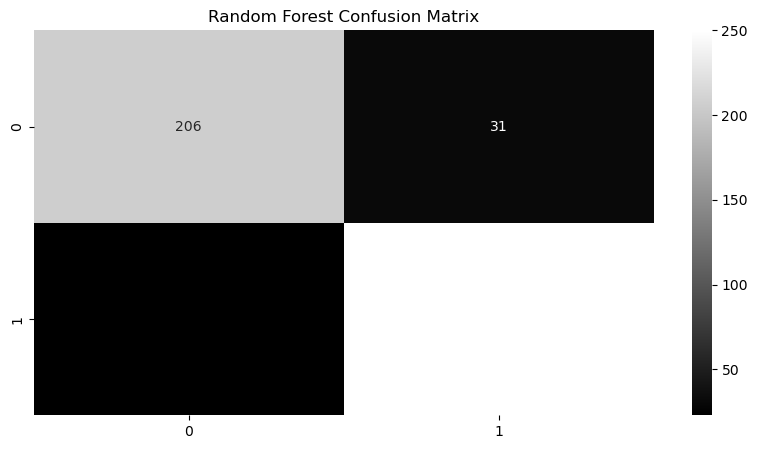

In [9]:
#----------------------------------------Random Forest------------------------------------#
from sklearn.ensemble import RandomForestClassifier

randomForest= RandomForestClassifier(n_estimators=100)
randomForest.fit(new_xtrain,y_train)

randomforestscore=randomForest.score(new_xtest,y_test)

print("The Accuracy for Random Forest",randomforestscore)

ypredictrandomforest=randomForest.predict(new_xtest)
print('The Predicted Values are',ypredictrandomforest)

mae_rf = mean_absolute_error(y_test, ypredictrandomforest)
print("The Mean Absolute Error for Random Forest is", mae_rf)

from sklearn.preprocessing import LabelBinarizer

binarizer = LabelBinarizer()
y_test_binary = binarizer.fit_transform(y_test)
ypredictRandomforest_binary = binarizer.transform(ypredictrandomforest)

conf_matrixRandomForest = confusion_matrix(y_test_binary, ypredictRandomforest_binary)

plt.figure(figsize=(10,5))
sn.heatmap(conf_matrixRandomForest,annot=True,cmap='grey',fmt='d',xticklabels=[0,1],yticklabels=[0,1])
plt.title("Random Forest Confusion Matrix")
plt.xlabel=('Prediction')
plt.ylabel=('Actual')
plt.show()

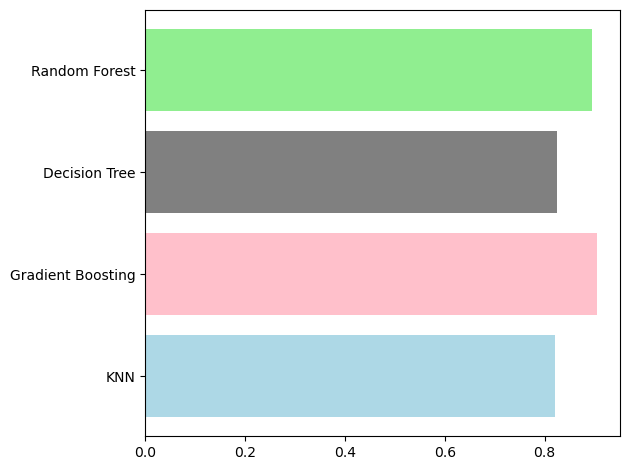

In [10]:
import matplotlib.pyplot as plt

# Assuming accuracy scores are defined
accuracy = {
     'KNN':knn_score,
    'Gradient Boosting':gradientboostingscore,
    'Decision Tree':DecisionTreeScore,
    'Random Forest':randomforestscore
}

# Creating a horizontal bar chart
bars = plt.barh(list(accuracy.keys()), list(accuracy.values()), color=['lightBlue', 'pink', 'grey', 'lightgreen'])
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.tight_layout()
plt.show()
